# Statistical Learning Week 2 hands on exercises


# Question 1

|Planned to purchase Apple iPhone Xs Max| Actually placed an order for Apple iPhone Xs Max- Yes| Actually placed an order for Apple iPhone Xs Max - No|Total|
|--|--|--|--|
|Yes|400|100|500|
|No|200|1300|1500|
|Total|600|1400|2000|

1. Calculate the joint probability of the people who planned to purchase and actually placed an order.

You observe from the above table, that 400 people planned to purchase and actually placed an order for Apple iPhone Xs Max is 
400 out of 2000 people.

In [1]:
# FE6 is the number of people who planned and actually placed an order for Apple iPhone Xs Max
FE6 = 400
TE  = 2000
PE7 = round(FE6 / TE,4) 
print('Joint probability of the people who planned to purchase and actually placed an order. is %1.4f' % PE7)

Joint probability of the people who planned to purchase and actually placed an order. is 0.2000


Joint probability of the people who planned to purchase and actually placed an order. is 0.2000

# Conditional Probability refers to the probability of event A, given information about the occurrence of another event B

# Probability of A given B is written as P(A | B).

Probability of A given B is written as P(A | B).

$P(A\mid B) = \frac{P(A \quad and \quad B)}{P(B)}$

where P(A and B) = Joint probability of A and B
*     P(A)       = Marginal probability of A
*     P(B)       = Marginal probability of B

# Question 2

Use the purchase of Apple iPhone Xs Max table.

Find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to 
purchase.

In [2]:
# P1 = P(Actually placed an order | Planned to purchase)
# P2 = Planned to purchase and actually placed an order
# P3 = Planned to purchase
P1   = (400 / 2000 )/ (500 / 2000)

print('P(Actually placed an order | Planned to purchase) is %1.4f' % P1)     

P(Actually placed an order | Planned to purchase) is 0.8000


# Binomial Distribution

It is widely used probability distribution of a discrete random variable. 

Plays major role in quality control and quality assurance function. 

$P(X = x\mid n,\pi)$ = $\frac{n!}{x!(n - x)!}\pi^x (1 - \pi)^{n-x} $
* where P(X = x) is the probability of getting x successes in n trials
and $\pi$ is the probability of an event of interest

Some important functions in Python for Binomial distribution:
    
1) Probability mass function
scipy.stats.binom.pmf gives the probability mass function for the binomial distribution
binomial = scipy.stats.binom.pmf (k,n,p), 
where k is an array and takes values in {0, 1,..., n}
n and p are shape parameters for the binomial distribution
The output, binomial, gives probability of binomial distribution function in terms of array.

2) Cumulative Density function
cumbinomial = scipy.stats.binom.cdf(k,n,p) gives cumulative binomial distribution.
The output, cumbinomial, gives cumulative probability of binomial distribution function in terms of array.

3) Plot the binomial Density function
The function, matplotlib.pyplot.plot(k, binomial, ‘o-’) gives us plot of the binomial distribution function.

# Question 3

A LED bulb manufacturing company regularly conducts quality checks at specified periods on the products it manufactures. 
Historically, the failure rate for LED light bulbs that the company manufactures is 5%. Suppose a random sample of 10 LED light 
bulbs is selected. What is the probability that 

a) None of the LED bulbs are defective?

b) Exactly one of the LED bulbs is defective?

c) Two or fewer of the LED bulbs are defective?

d) Three or more of the LED bulbs are defective

In [3]:
import numpy             as np
import pandas            as pd
import scipy.stats       as stats
import matplotlib.pyplot as plt

In [4]:
p   =  0.05 # failure rate for LED light bulbs that the company manufactures is 5%
n   =  10 # sample size
k   =  np.arange(0,11) # An array of quantiles

In [5]:
binomial = stats.binom.pmf(k,n,p)

In [6]:
print(binomial)

[5.98736939e-01 3.15124705e-01 7.46347985e-02 1.04750594e-02
 9.64808106e-04 6.09352488e-05 2.67259863e-06 8.03789063e-08
 1.58642578e-09 1.85546875e-11 9.76562500e-14]


In [7]:
print('a) None of the LED bulbs are defective? is %1.4f' %binomial[0])

a) None of the LED bulbs are defective? is 0.5987


In [8]:
print('b) Exactly one of the LED bulbs is defective? is %1.4f' %binomial[1])

b) Exactly one of the LED bulbs is defective? is 0.3151


To answer the question c) Two or fewer of the LED bulbs are defective?

we need to calculate cumulative probability of Upto Two LED bulbs being defective

In [9]:
cumbinomial = stats.binom.cdf(k,n,p)

In [10]:
print(cumbinomial)

[0.59873694 0.91386164 0.98849644 0.9989715  0.99993631 0.99999725
 0.99999992 1.         1.         1.         1.        ]


In [11]:
print('c) Two or fewer of the LED bulbs are defective? is %1.4f' %cumbinomial[2])

c) Two or fewer of the LED bulbs are defective? is 0.9885


To answer the question d) Three or more of the LED bulbs are defective, we need to subtract cumulative Probability upto 2 
defective LED bulbs from 1.

In [12]:
P = 1- cumbinomial[2]
print('d) Three or more of the LED bulbs are defective is %1.4f' % P)

d) Three or more of the LED bulbs are defective is 0.0115


# Plot the binomial distribution function

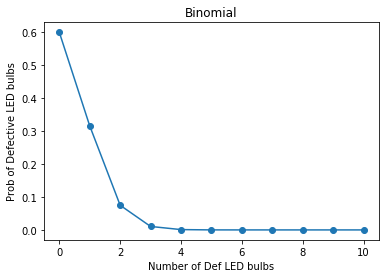

In [13]:
plt.plot(k,binomial, 'o-')
plt.title('Binomial')
plt.xlabel('Number of Def LED bulbs')
plt.ylabel('Prob of Defective LED bulbs')
plt.show()

# Poisson Distribution

This discrete distribution which also plays a major role in quality control. 

The Poisson distribution is a discrete probability distribution for the counts of events that occur randomly in a given 
interval of time or space. In such areas of opportunity, there can be more than one occurrence. In such situations, Poisson 
distribution can be used to compute probabilities.

Examples include number of defects per item, number of defects per transformer produced. 
Notes: Poisson Distribution helps to predict the arrival rate in a waiting line situation where a queue is formed and people 
wait to be served and the service rate is generally higher than the arrival rate.

# Properties:

Mean μ = λ

Standard deviation σ = √ μ

The Poisson distribution is the limit of binomial distribution as n approaches ∞and p approaches 0

P(X = x) = $\frac{e^\lambda \lambda^x}{x!} $
where 
* P(x)              = Probability of x successes given an idea of  $\lambda$
* $\lambda$ = Average number of successes
* e                   = 2.71828 (based on natural logarithm)
* x                    = successes per unit which can take values 0,1,2,3,... $\infty$

Applications

Car Accidents

Number of deaths by horse kicking in Prussian Army (first application)

Birth defects and genetic mutation

Note

If there is a fixed number of observations, n, each of which is classified as an event of interest or not an event of interest,
use the binomial distribution.

If there is an area of opportunity, use the Poisson distribution.

# Question 4

A Life Insurance agent sells on the average 3 life insurance policies per week. Use the Poisson law to calculate the 
probability that in a given week, he will sell a. Some policies b. 2 or more but less than 5 policies?

Here $\lambda$ = 3

In [14]:
rate =  3 # which is the mean
n    =  np.arange(0,16)
cumpoisson = stats.poisson.cdf(n,rate)

In [15]:
cumpoisson

array([0.04978707, 0.19914827, 0.42319008, 0.64723189, 0.81526324,
       0.91608206, 0.96649146, 0.9880955 , 0.99619701, 0.99889751,
       0.99970766, 0.99992861, 0.99998385, 0.9999966 , 0.99999933,
       0.99999988])

In [16]:
# P = probability that the agent sells some policies
P   = 1 - cumpoisson[0]
print(' a) Probability that the agent sells some policies is %1.4f' % P)

 a) Probability that the agent sells some policies is 0.9502


b. Agent sells 2 or more but less than 5 policies 

In [17]:
# Let P1 be the probability that the agent sells more than 4 policies
P1 = cumpoisson[4] # P(X >=4)
# Let P2 be the probability that the agent sells more than 1 policy
P2 = cumpoisson[1] # P(X >=1)
P = P1 - P2 # Prob. that the agent will sell between 2 and 5 policies
print(' b) Probability that the agent sells between 2 and 5 policies is %1.4f' % P)

 b) Probability that the agent sells between 2 and 5 policies is 0.6161


# Plot a poisson distribution function

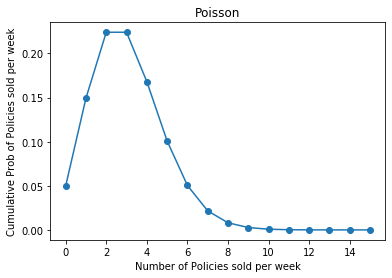

In [18]:
poisson = stats.poisson.pmf(n,rate)
plt.plot(n,poisson, 'o-')
plt.title('Poisson')
plt.xlabel('Number of Policies sold per week')
plt.ylabel('Cumulative Prob of Policies sold per week')
plt.show()

# Question 5

Computing Binomial probabilities for service at a Fast-Food Restaurant

# Context:

Accuracy in taking orders at a drive -through window is important for fast- food chains.Periodically, QSR Magazine publishes "The Drive- thru Performance Study: Order accuracy" that measures the percentage of orders that ar3 filled correctly. In a recent month, the percentage of orders filled correctly at Wendy's was approximately 86.8%. Suppose that you go to drive-through window at Wendy's and place an order. Two friends of yours independently place orders at the drive-through window at the same Wendy's.

# What are the probabilities that all three that none of the three, and that atleast two of the three orders will be filled correctly?

In [19]:
Because there are three orders and the probability of a correct order is 0.868.
    Using Binomial distribution equation,
    
    P(X = 3|n =3, pi given = 0.868)
    3!/ 3!(3-3)! * (0.868)^3 * (1-0.868)^3-3 = 0.6540
    
    Likewise, calculate X= 0, X=2
     (X = 0) = 0.0023
     (X = 2) = 0.2984
    
    Hence, P(X>=2) = P(X=2)+P(X=3) = 0.9524

SyntaxError: invalid syntax (<ipython-input-19-f6806da3488e>, line 1)

The probability that all the three orders are filled correctly is 0.6540, 65.4% The probability that none of the orders are 
filled correctly is 0.0023, 0.23% The probability that atleat two of the three are filled correctly is 0.9524, 95.24%

## Question 6: Business Statistics Course

# Objectives: Calculate probabilities based on Poisson and Normal distribution

# Context: 
At the Conclusion of a course in business statistics, a group of management students sat for a written examination. The results 
throw up the following information.

Marks obtained have a mean of 60 and a standard deviation of 12. There were 300 students who wrote the exam. 
The pattern of marks follows a normal distribution 
a) what is the percentage of students who score more than 80
b) What is the percentage of students who score less than 50
c) What should be the distinction mark if the highest 10% of students are to be awarded distinction?
Graphical method can be used for convenience.

a) Lets use the ztable that gives the area between 0 and positive z.
Z = (x - µ)/σ 
(80 -60)/12 =1.67 
proportions of students who score more than 1.67 = 0.5 - proportion scoring between 0 and 1.67 = 0.5 - 0.4525 = 0.0475
That is 4.75% of students have scored more than 80

b) similarly (50 - 60)/12 = -0.8333. Applying the property of symmetry, the area upto -0.8333 is same as area more 
than 0.8333 in the positive side. As before, it is = 0.5 - area between 0 and 0.8333 =  0.5 - 0.2967 = 0.2033. That is
20.33% of students scored below 50

c) Z = (x-60)/12. Here look at the normal tabel in inverse manner. That is the value of Z, the area between 0 and
z = 0.40. this is to be seen from teh table.
 The Z value that will make the area =  0.40 is = 1.28. But z= (x - 60)/12. Hence (x-60)/12 = 1.28 Simplifying, x= 75.36
This is the distinction mark that will be scored by 10% of the students.